In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
#Base Path to get the clean dataset
project_root = Path.cwd().parent  # because notebook is in notebooks/
pred_path = project_root / "data" / "processed" / "cleaned_life_expectancy_gdp_co2.csv"
df_clean =  pd.read_csv(pred_path)

#setting up the output folder to export the visualizations
project_root = Path.cwd().parent  # adjust if needed
eda_dir = project_root / "src" / "visualizations" / "exploratory_data_analysis"
eda_dir.mkdir(parents=True, exist_ok=True)


Saved: c:\Users\jczoc\OneDrive - Bentley University\MA 705\Project\Life_Expectancy_Project\src\visualizations\exploratory_data_analysis\global_life_expectancy_over_time.png


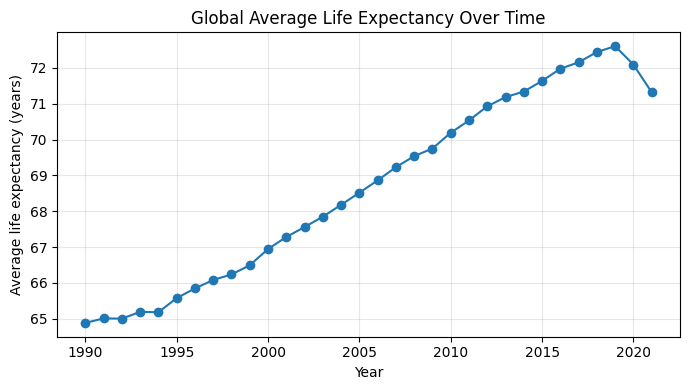

In [2]:
#Grabbing the mean life expectancy by year
mean_by_year = df_clean.groupby("year")["life_expectancy"].mean().reset_index()

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(
    mean_by_year["year"],
    mean_by_year["life_expectancy"],
    marker="o",
    linestyle="-",
)

ax.set_xlabel("Year")
ax.set_ylabel("Average life expectancy (years)")
ax.set_title("Global Average Life Expectancy Over Time")
ax.grid(alpha=0.3)

fig.tight_layout()

#save the figure
life_expectancy_trend_png = eda_dir / "global_life_expectancy_over_time.png"
fig.savefig(life_expectancy_trend_png, dpi=300, bbox_inches="tight")
print("Saved:", life_expectancy_trend_png)

Saved: c:\Users\jczoc\OneDrive - Bentley University\MA 705\Project\Life_Expectancy_Project\src\visualizations\exploratory_data_analysis\life_expectancy_vs_log_gdp.png


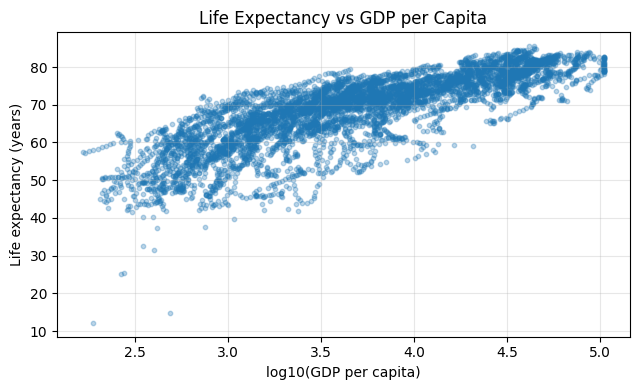

In [3]:
#Keeping only gdp per capita and life expectancy
data = df_clean.dropna(subset=["gdp_per_capita", "life_expectancy"]).copy()
data["log_gdp"] = np.log10(data["gdp_per_capita"]) #getting the log of gdp per capita

fig, ax = plt.subplots(figsize=(6.5, 4))

ax.scatter(data["log_gdp"], data["life_expectancy"], alpha=0.3, s=10)
ax.set_xlabel("log10(GDP per capita)")
ax.set_ylabel("Life expectancy (years)")
ax.set_title("Life Expectancy vs GDP per Capita")
ax.grid(alpha=0.3)

fig.tight_layout()

# Save figure
gdp_vs_life_png = eda_dir / "life_expectancy_vs_log_gdp.png"
fig.savefig(gdp_vs_life_png, dpi=300, bbox_inches="tight")
print("Saved:", gdp_vs_life_png)

plt.show()

Saved: c:\Users\jczoc\OneDrive - Bentley University\MA 705\Project\Life_Expectancy_Project\src\visualizations\exploratory_data_analysis\top5_gdp_countries_life_expectancy_over_time.png


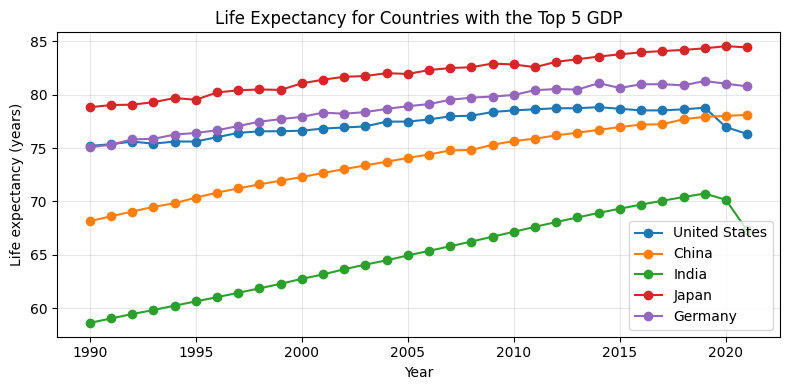

In [4]:

#Countries with top 5 gdp
countries = ["United States", "China", "India", "Japan", "Germany"]
subset = df_clean[df_clean["country_name"].isin(countries)]

fig, ax = plt.subplots(figsize=(8, 4))

for c in countries:
    c_data = subset[subset["country_name"] == c].sort_values("year")
    ax.plot(
        c_data["year"],
        c_data["life_expectancy"],
        marker="o",
        linestyle="-",
        label=c,
    )

ax.set_xlabel("Year")
ax.set_ylabel("Life expectancy (years)")
ax.set_title("Life Expectancy for Countries with the Top 5 GDP")
ax.legend()
ax.grid(alpha=0.3)

fig.tight_layout()

#Save the figure
top5_gdp_life_png = eda_dir / "top5_gdp_countries_life_expectancy_over_time.png"
fig.savefig(top5_gdp_life_png, dpi=300, bbox_inches="tight")
print("Saved:", top5_gdp_life_png)

plt.show()

Saved: c:\Users\jczoc\OneDrive - Bentley University\MA 705\Project\Life_Expectancy_Project\src\visualizations\exploratory_data_analysis\log_gdp_vs_log_co2_scatter.png


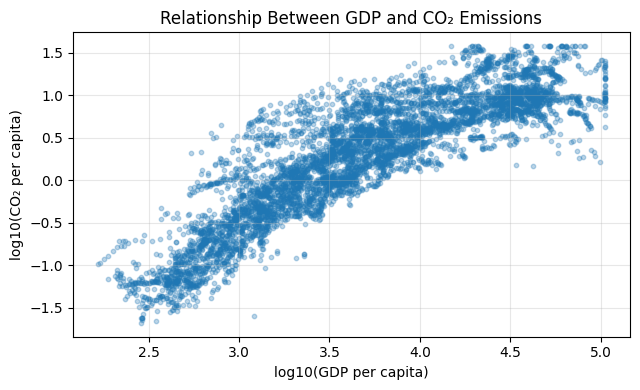

In [5]:
#Getting the GDP and Co2 emissions, taking the log of both
data = df_clean.dropna(subset=["gdp_per_capita", "co2_per_capita"]).copy()
data = data[(data["gdp_per_capita"] > 0) & (data["co2_per_capita"] > 0)]
data["log_gdp"] = np.log10(data["gdp_per_capita"])
data["log_co2"] = np.log10(data["co2_per_capita"])

fig, ax = plt.subplots(figsize=(6.5, 4))

ax.scatter(data["log_gdp"], data["log_co2"], alpha=0.3, s=10)
ax.set_xlabel("log10(GDP per capita)")
ax.set_ylabel("log10(CO₂ per capita)")
ax.set_title("Relationship Between GDP and CO₂ Emissions")
ax.grid(alpha=0.3)

fig.tight_layout()

#save figure
gdp_vs_co2_png = eda_dir / "log_gdp_vs_log_co2_scatter.png"
fig.savefig(gdp_vs_co2_png, dpi=300, bbox_inches="tight")
print("Saved:", gdp_vs_co2_png)

plt.show()


Saved: c:\Users\jczoc\OneDrive - Bentley University\MA 705\Project\Life_Expectancy_Project\src\visualizations\exploratory_data_analysis\correlation_matrix_predictors.png


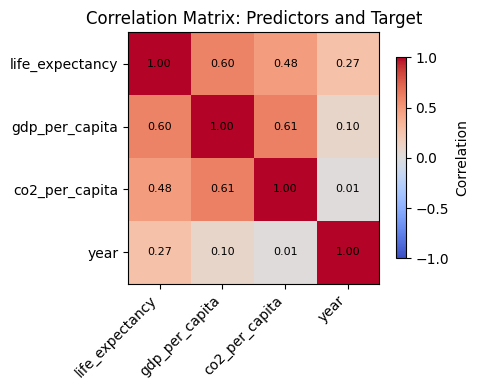

In [6]:
#Choose variables for correlation matrix
cols = ["life_expectancy", "gdp_per_capita", "co2_per_capita", "year"]
corr = df_clean[cols].corr()

fig, ax = plt.subplots(figsize=(5, 4))

im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

#Axis labels
ax.set_xticks(range(len(cols)))
ax.set_yticks(range(len(cols)))
ax.set_xticklabels(cols, rotation=45, ha="right")
ax.set_yticklabels(cols)

#Annotate correlation values
for i in range(len(cols)):
    for j in range(len(cols)):
        ax.text(
            j,
            i,
            f"{corr.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=8,
        )

fig.colorbar(im, ax=ax, shrink=0.8, label="Correlation")

ax.set_title("Correlation Matrix: Predictors and Target")

fig.tight_layout()

#save figure
corr_png = eda_dir / "correlation_matrix_predictors.png"
fig.savefig(corr_png, dpi=300, bbox_inches="tight")
print("Saved:", corr_png)

plt.show()

In [7]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("../data/processed/merged_dataset_with_continents.csv")
df = df.sort_values("year")

continent_order = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]
df["continent"] = pd.Categorical(df["continent"], categories=continent_order, ordered=True)

fig = px.scatter(
    df,
    x="gdp_per_capita",
    y="life_expectancy",
    animation_frame="year",
    animation_group="country_name",
    size="co2_per_capita",
    color="continent",
    facet_col="continent",
    facet_col_wrap=3,
    hover_name="country_name",       # show country name on hover
    hover_data={    
        "continent": False,                 # hide continent on hover
        "gdp_per_capita": True,
        "life_expectancy": True,
        "co2_per_capita": True
    },
    log_x=True,
    size_max=45,
    range_x=[100, 100000],
    range_y=[25, 90],
    opacity=0.8,
    title="GDP vs Life Expectancy (Bubble Size = CO₂ Emissions)"
)

# Clean background
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title_x=0.5,
    legend_title_text="Continent",
    margin=dict(t=100, l=40, r=40, b=40)
)

fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

# Remove "continent=" text from facet titles
for a in fig.layout.annotations:
    a.text = a.text.replace("continent=", "")

fig.show()


In [8]:
import plotly.express as px
import pandas as pd


fig = px.choropleth(
    df_clean,
    locations="iso3",
    color="life_expectancy",
    hover_name="country_name", 
    projection="natural earth"
)

fig.update_layout(
    coloraxis_showscale=False,
    title="Interactive World Map Life Expectancy"
)

fig.show()


In [9]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_csv("../data/processed/merged_dataset_with_continents.csv")

# Compute medians by year
yearly = df.groupby("year").agg(
    median_life=("life_expectancy", "median"),
    median_gdp=("gdp_per_capita", "median"),
    median_co2=("co2_per_capita", "median")
).reset_index()

# Create figure
fig = go.Figure()

# Life Expectancy (Left axis)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_life"],
    mode="lines",
    name="Life Expectancy (Median)",
    line=dict(width=3, color="#1f77b4"),
    yaxis="y"
))

# GDP (Right axis 1)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_gdp"],
    mode="lines",
    name="GDP per Capita (Median)",
    line=dict(width=3, color="#ff7f0e"),
    yaxis="y2"
))

# CO2 (Right axis 2 — outside)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_co2"],
    mode="lines",
    name="CO₂ per Capita (Median)",
    line=dict(width=3, color="#2ca02c"),
    yaxis="y3"
))

# LAYOUT AND AXES
fig.update_layout(
    title="Global Trends: Life Expectancy, GDP, and CO₂ Over Time",
    template="plotly_white",
    hovermode="x unified",
    width=1100,
    height=650,
    legend_title="Toggle Variables",

    # Y-Axis 1 (Life Expectancy)
    yaxis=dict(
        title=dict(text="Life Expectancy (Years)", font=dict(color="#1f77b4")),
        tickfont=dict(color="#1f77b4"),
        side="left"
    ),

    # Y-Axis 2 (GDP)
    yaxis2=dict(
        title=dict(text="GDP per Capita", font=dict(color="#ff7f0e")),
        tickfont=dict(color="#ff7f0e"),
        overlaying="y",
        side="right",
        position=1.0
    ),

    # Y-Axis 3 (CO2)
    yaxis3=dict(
        title=dict(text="CO₂ per Capita", font=dict(color="#2ca02c")),
        tickfont=dict(color="#2ca02c"),
        overlaying="y",
        side="right",
        position=.9   # moved further to avoid overlap
    ),

    xaxis=dict(title="Year")
)

fig

